## ImageNet Challenge

https://paperswithcode.com/sota/image-classification-on-imagenet

## FixEfficientNet 
- самая эффективная реализация алгоритма классификации картинки для ImageNet 98,7%

Реализация: <br>
https://github.com/facebookresearch/FixRes

Для того чтобы получить лучший результат при обучение, нужно чтобы распределение данных внутри обучающего и тестового датасета совпадало.
Однако, в алгоритмах по распознованию изображений, предобработка данных часто отличается для train и test датасетов: самая популярная практика, это случайным образом извлечь из картинки прямоуголную область с случайными координатами, чтобы искусствено увеличить объем данных для обучения. Затем для этой Области Классификации меняется размер или ее обрезают до определенных размеров в пикселях и то что получилось скармливают нейронной сети. А в тестовой же выборке, Область Классификации устанавливается как квадрат по центру изображения. Поэтому после обрезания изображения в test и train мы имеем картинку одинакового размера, но взятую из разных частей первоначальной картинки => у нас получается искажение искомого объекта.<br> <br>

Эта проблема решается здесь при помощи FixRes,
который оптимизирует выбор разрешения и масштабов в тестовой и тренировочной выборке, поддерживая одинаковую область классификации. Его плюсы в том, что он занмает мало ресурсов за счет того, что он перещитывает коэффиценты не всей сети, а только пары последних слоев в определенном разрешении.

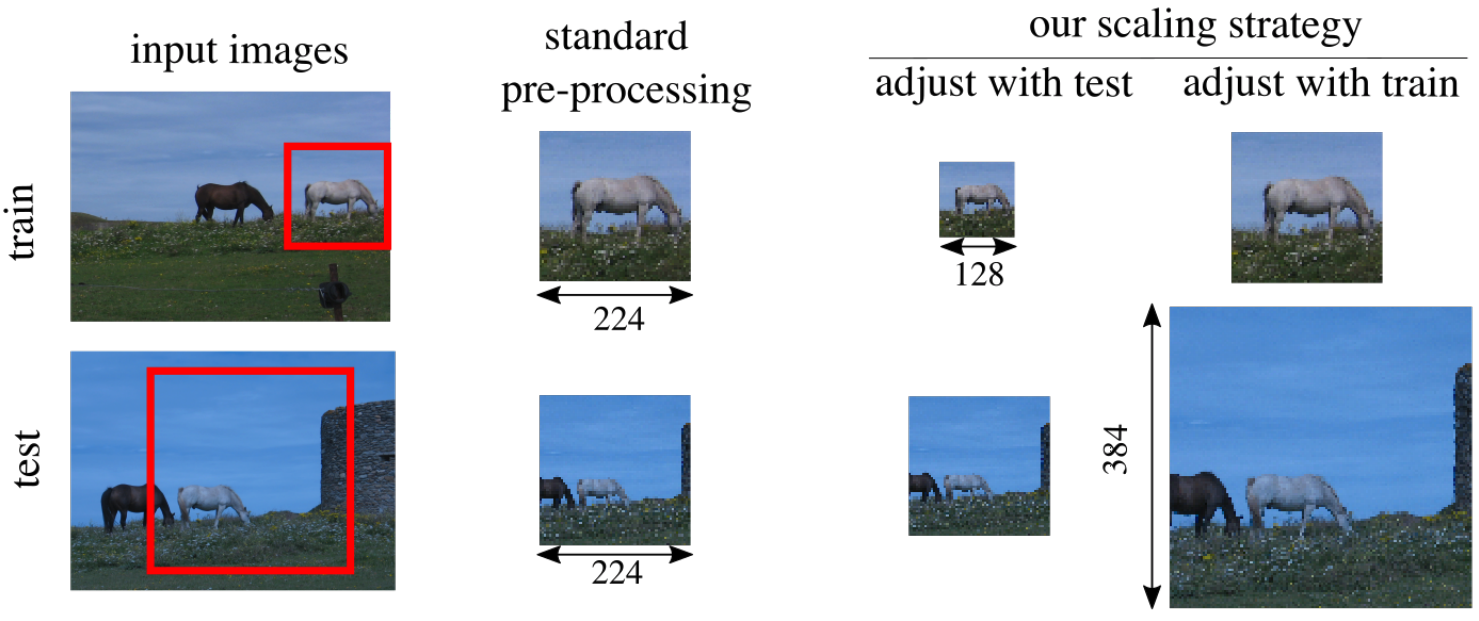

В итоге для получения наиболее эффективного решения мы используем связку FixRes + EfficientNet-L2 предобученную без учителя с 480 миллионами параметров на картинках резрешением 800×800. Обучение происходило на 300 миллионах неразмеченных картинок. <br>(Для обучения с нуля образцовой архитектурой является EfficientNet-B8 с 88M параметров, использующая для обучения картинки разрешением 672×672.)

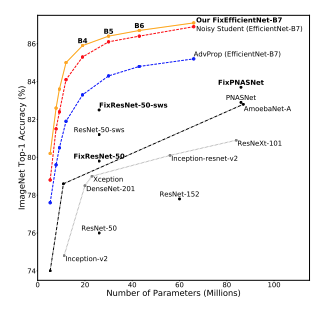

оранжевая линия это нащи решения в связке FixRes + EfficientNet по сравнению с красной линией - это просто EfficientNet

На этапе FixRes они предлагают еще один трюк для дополнительной регуляризации — так называемый label smoothing. LabelSmoothingCrossEntropy() - функция потерь. Идея вкратце такая: обычно target label для конкретного сэмпла это 1 там где класс правильный, и 0 где класс неправильный. Это означает, что если сеть не очень уверена в правильности класса, градиент все равно будет толкать в увеличение и увеличение этой уверенности, потому что 1 наступает только на бесконечности из-за softmax, что ведет к переобучению.

Они предлагают смешивать one-off target с распределением пропорциональным, тупо распределению классов по датасету, чтобы в других классах были не нули, а какие-то маленькие значения. Это дает модели большую описательную способность и чуть лучший результат.